## https://www.kaggle.com/competitions/nlp-getting-started/overview

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
import keras_nlp
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-02-07 18:38:06.859831: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-07 18:38:06.859965: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-07 18:38:07.133800: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Using TensorFlow backend
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/distil_bert/keras/distil_bert_base_en_uncased/2/config.json
/kaggle/input/distil_bert/keras/distil_bert_base_en_uncased/2/tokenizer.json
/kaggle/input/distil_bert/keras/distil_bert_base_en_uncased/2/metadata.json
/kaggle/input/distil_bert/keras/distil_bert_base_en_uncased/2/model.weights.h5
/kaggle/input/distil_bert/keras/distil_bert_base_en_uncased/2/assets/tokenizer/vocabulary.txt


In [2]:
# !pip install keras-nlp
# !pip install plotly_express

In [3]:
df_train      = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
df_test       = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
df_submission = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')

In [4]:
df_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
df_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [6]:
def show_null_data(data):
    null_count = data.isna().sum()
    null_percent = data.isna().sum() / len(data)
    null_percent = null_percent.apply(lambda x: f"{x:.1%}")
    print("Duplicated Total Count: ", data.duplicated().sum())
    result = pd.concat([null_count, null_percent], axis=1)
    result.columns = ['Null Count', 'Null Percentage']
    return result

print("DataFrame name: df_train")
show_null_data(df_train)

DataFrame name: df_train
Duplicated Total Count:  0


,Null Count,Null Percentage
id,0,0.0%
keyword,61,0.8%
location,2533,33.3%
text,0,0.0%
target,0,0.0%


In [7]:
print("DataFrame name: df_test")
show_null_data(df_test)

DataFrame name: df_test
Duplicated Total Count:  0


,Null Count,Null Percentage
id,0,0.0%
keyword,26,0.8%
location,1105,33.9%
text,0,0.0%


In [8]:
df_train['len_text'] = df_train['text'].apply(len)
df_test['len_text'] = df_test['text'].apply(len)

In [9]:
df_train['len_text']

0        69
1        38
2       133
3        65
4        88
       ... 
7608     83
7609    125
7610     65
7611    137
7612     94
Name: len_text, Length: 7613, dtype: int64

In [10]:
df_test['len_text']

0        34
1        64
2        96
3        40
4        45
       ... 
3258     55
3259    139
3260     55
3261     65
3262     68
Name: len_text, Length: 3263, dtype: int64

In [11]:
fig = px.histogram(df_train, x='len_text', color='len_text', template='plotly_dark')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [12]:
fig = px.pie(df_train, names='target', hole=0.3, template='plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+value', title='Distribution of target values')
fig.show()

In [13]:
df_train['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [14]:
df_train['text'].dtypes

dtype('O')

In [15]:
import re
import nltk
from nltk.corpus import stopwords
from string import punctuation
import string
nltk.download('stopwords')

def clean_data(text):
    text = re.sub(r'[^ \nA-Za-z0-9À-ÖØ-öø-ÿ/]+', '', text)
    text = re.sub(r'[\\/×\^\]\[÷]', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    return text
def change_lower(text):

    return tf.strings.lower(text).numpy().decode('utf-8')

stopwords_list = stopwords.words('english')

def remover(text):
  text_tokens = text.split(' ')
  final_list = [word for word in text_tokens if not word in stopwords_list]
  text = ' '.join(final_list)
  return text


df_train['text'] = df_train['text'].apply(change_lower)
df_train['text'] = df_train['text'].apply(clean_data)
df_train['text'] = df_train['text'].apply(remover)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
learning_rate  = 1e-5
batch_size     = 16
epoch          = 1
max_seq_length = 128
AUTO           = tf.data.experimental.AUTOTUNE

In [17]:
from sklearn.model_selection import train_test_split

X = df_train['text']
y = df_train['target']
X_test = df_test['text']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=54, shuffle=True)

In [18]:
preset = "distil_bert_base_en_uncased"
preprocessor = keras_nlp.models.DistilBertPreprocessor.from_preset(preset, sequence_length = max_seq_length)
classifier = keras_nlp.models.DistilBertClassifier.from_preset(preset, preprocessor = preprocessor, num_classes = 2)


Attaching 'tokenizer.json' from model 'keras/distil_bert/keras/distil_bert_base_en_uncased/2' to your Kaggle notebook...
Attaching 'tokenizer.json' from model 'keras/distil_bert/keras/distil_bert_base_en_uncased/2' to your Kaggle notebook...
Attaching 'assets/tokenizer/vocabulary.txt' from model 'keras/distil_bert/keras/distil_bert_base_en_uncased/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/distil_bert/keras/distil_bert_base_en_uncased/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/distil_bert/keras/distil_bert_base_en_uncased/2' to your Kaggle notebook...
Attaching 'model.weights.h5' from model 'keras/distil_bert/keras/distil_bert_base_en_uncased/2' to your Kaggle notebook...
/opt/conda/lib/python3.10/site-packages/keras_nlp/src/models/backbone.py:37: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.

/opt/conda/lib/pyt

In [19]:
classifier.summary()

Preprocessor: "distil_bert_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ distil_bert_tokenizer (DistilBertTokenizer)        │                                              30,522 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "distil_bert_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                  ┃ Output Shape                           ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)                     │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ token_ids (InputLayer)                        │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ distil_bert_backbone (DistilBertBackbone)     │ (None, None, 768)                      │      66,362,880 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ tf.__operators__.getitem (SlicingOpLambda)    │ (None, 768)                            │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ pooled_dense (Dense)                          │ (None, 768)                            │         590,592 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ classifier_dropout (Dropout)                  │ (None, 768)                            │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ logits (Dense)                                │ (None, 2)                              │           1,538 │
└───────────────────────────────────────────────┴────────────────────────────────────────┴─────────────────┘

 Total params: 66,955,010 (255.41 MB)

 Trainable params: 66,955,010 (255.41 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
classifier.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                         metrics=['accuracy'])
history = classifier.fit(x = X_train,
                               y = y_train,
                               batch_size = batch_size,
                               epochs = epoch,
                               validation_data=(X_val, y_val))

I0000 00:00:1707331145.321795      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


357/357 [==============================] - 108s 238ms/step - loss: 0.4825 - accuracy: 0.7870 - val_loss: 0.4179 - val_accuracy: 0.8267


In [21]:
def plot_history(history):

    losses = history.history['loss']
    val_losses = history.history['val_loss']


    accuracies = history.history['accuracy']
    val_accuracies = history.history['val_accuracy']


    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    axes[0].plot(losses, label='Train Loss', color='orange')
    axes[0].plot(val_losses, label='Validation Loss', color='cyan')
    axes[0].legend()
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Training and Validation Loss')


    axes[1].plot(accuracies, label='Train Accuracy', color='orange')
    axes[1].plot(val_accuracies, label='Validation Accuracy', color='cyan')
    axes[1].legend()
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title('Training and Validation Accuracy')


    plt.tight_layout()
    plt.show()

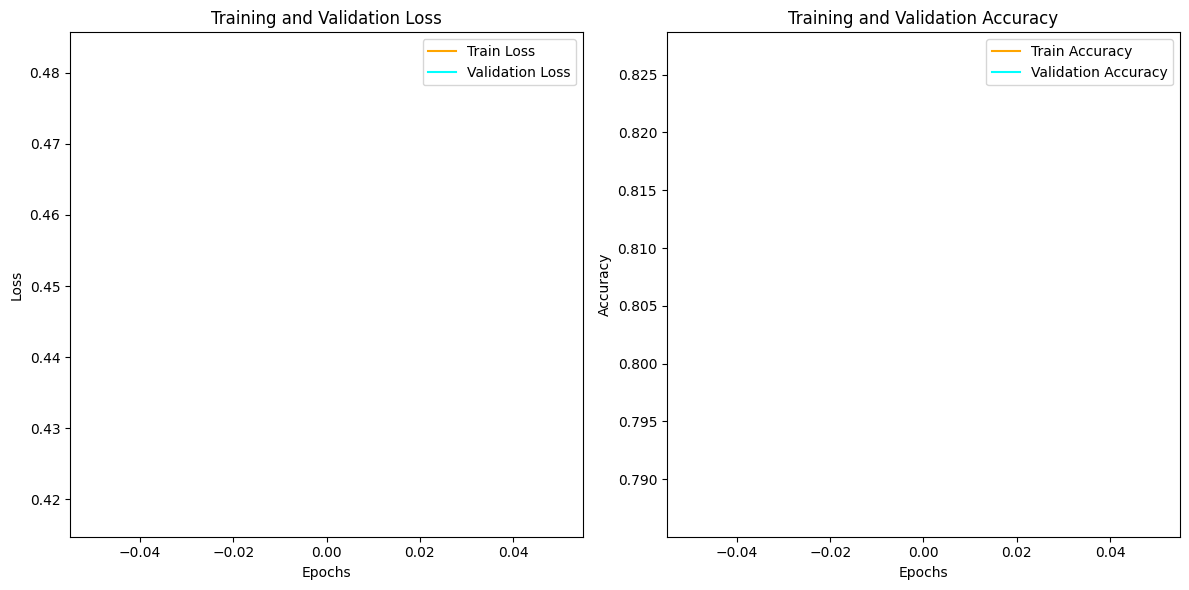

In [22]:
plot_history(history)

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [24]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
    y_true,
    np.argmax(y_pred, axis = 1),
    display_labels = ["Not Disaster", "Disaster"],
    cmap = plt.cm.Blues
    )

    tn,fp,fn,tp = confusion_matrix(y_true, np.argmax(y_pred, axis = 1)).ravel()
    f1_score = tp/(tp+((fn+fp)/2))

    disp.ax_.set_title("Confusion Matrix on" + dataset + "Dataset -- F1 Score: " +str(f1_score.round(2)))

179/179 [==============================] - 30s 161ms/step


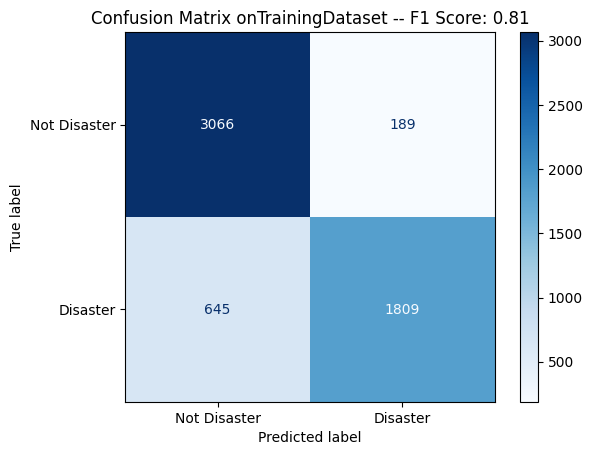

In [25]:
y_pred = classifier.predict(X_train)
displayConfusionMatrix(y_train, y_pred, "Training")


60/60 [==============================] - 10s 159ms/step


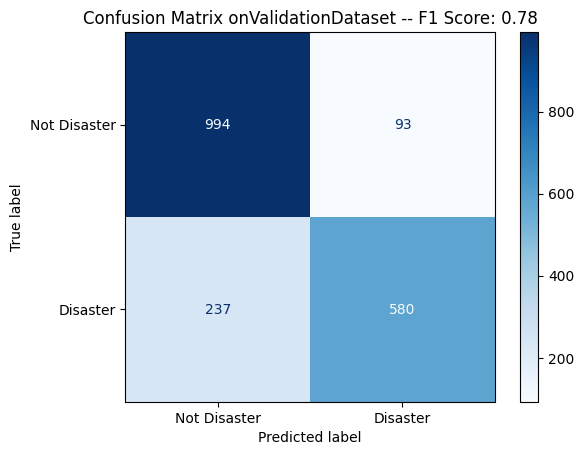

In [26]:
y_pred_val = classifier.predict(X_val)
displayConfusionMatrix(y_val, y_pred_val, "Validation")

In [27]:
df_test

,id,keyword,location,text,len_text
0,0,NaN,NaN,Just happened a terrible car crash,34
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",64
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",96
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,40
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,45
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,55
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,139
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,55
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,65


In [28]:
submission = pd.DataFrame()
submission['id'] = df_test['id']
submission['target'] = classifier.predict(df_test['text'])[:, 1]
submission.to_csv('submission.csv',index=False)

102/102 [==============================] - 17s 160ms/step
